# Trabajo Data Science Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt

# Carga y comprensión de los datos a trabajar

Se realiza una visión general de los valores únicos presentes en cada columna de nuestro Data set de la aerolínea "Invistico".

In [2]:
df = pd.read_csv('Invistico_Airline.csv')
for i in df.columns:
    print(df[i].unique(),' ', i,' cont:',len(df[i].unique()))

['satisfied' 'dissatisfied']   satisfaction  cont: 2
['Female' 'Male']   Gender  cont: 2
['Loyal Customer' 'disloyal Customer']   Customer Type  cont: 2
[65 47 15 60 70 30 66 10 56 22 58 34 62 35 13 52 55 28  9 25 53 16 64 42
 21 20 26 48 57 31 17 33 32 38 29 24 37  7 39 11 49  8 40 45 67 59 44 69
 51 18 23 12 46 41 54 27 63 61 36 50 68 19 14 43 72 71 80 77 85 78 75 79
 74 73 76]   Age  cont: 75
['Personal Travel' 'Business travel']   Type of Travel  cont: 2
['Eco' 'Business' 'Eco Plus']   Class  cont: 3
[ 265 2464 2138 ... 5832 5120 4260]   Flight Distance  cont: 5398
[0 1 4 5 2 3]   Seat comfort  cont: 6
[0 1 2 3 4 5]   Departure/Arrival time convenient  cont: 6
[0 1 2 3 4 5]   Food and drink  cont: 6
[2 3 4 1 5 0]   Gate location  cont: 6
[2 0 3 4 5 1]   Inflight wifi service  cont: 6
[4 2 0 3 5 1]   Inflight entertainment  cont: 6
[2 3 4 5 1 0]   Online support  cont: 6
[3 2 1 5 4 0]   Ease of Online booking  cont: 6
[3 4 1 2 5 0]   On-board service  cont: 6
[0 4 3 2 5 1]   Leg roo

# Tipo de datos a trabajar
La gran mayoría las features son de tipo int64 os permite realizar análisis estadísticos y cálculos matemáticos

# Podemos ver la información sobre cada feature con .describe()
**Y analizamos los outliers comparando el mean (promedio) con el max**

Entonces notamos que en Flight Distance, Departure Delay in Minutes y Arrival Delay in Minutes la diferencia es muy grande. 
Para Departure Delay in Minutes el promedio es 14.71 para los minutos de retraso y el máximo es 1592.

In [3]:
df.describe()

Age  Flight Distance   Seat comfort  \
count  129880.000000    129880.000000  129880.000000   
mean       39.427957      1981.409055       2.838597   
std        15.119360      1027.115606       1.392983   
min         7.000000        50.000000       0.000000   
25%        27.000000      1359.000000       2.000000   
50%        40.000000      1925.000000       3.000000   
75%        51.000000      2544.000000       4.000000   
max        85.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                      129880.000000   129880.000000  129880.000000   
mean                            2.990645        2.851994       2.990422   
std                             1.527224        1.443729       1.305970   
min                             0.000000        0.000000       0.000000   
25%                             2.000000        2.000000       2.000000   
50%                             3.000000        3.000000       3.000000   
75%                             4.000000        4.000000       4.000000   
max                             5.000000        5.000000       5.000000   

       Inflight wifi service  Inflight entertainment  Online support  \
count          129880.000000           129880.000000   129880.000000   
mean                3.249130                3.383477        3.519703   
std                 1.318818                1.346059        1.306511   
min                 0.000000                0.000000        0.000000   
25%                 2.000000                2.000000        3.000000   
50%                 3.000000                4.000000        4.000000   
75%                 4.000000                4.000000        5.000000   
max                 5.000000                5.000000        5.000000   

       Ease of Online booking  On-board service  Leg room service  \
count           129880.000000     129880.000000     129880.000000   
mean                 3.472105          3.465075          3.485902   
std                  1.305560          1.270836          1.292226   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          3.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  5.000000          4.000000          5.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service    Cleanliness  Online boarding  \
count     129880.000000    129880.000000  129880.000000    129880.000000   
mean           3.695673         3.340807       3.705759         3.352587   
std            1.156483         1.260582       1.151774         1.298715   
min            1.000000         0.000000       0.000000         0.000000   
25%            3.000000         3.000000       3.000000         2.000000   
50%            4.000000         3.000000       4.000000         4.000000   
75%            5.000000         4.000000       5.000000         4.000000   
max            5.000000         5.000000       5.000000         5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               129880.000000             129487.000000  
mean                    14.713713                 15.091129  
std                     38.071126                 38.465650  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

# Limpieza de datos

Se realiza una busqueda de nulos en alguna de las columnas de nuestro data frame.

In [5]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Como se puede visualizar la única columna con valores nulos es la de "Arrival Delay in Minutes", por lo que se procede a eliminar los mismos y no reemplazarlos por un valor como la mediana para evitar suponer información sobre datos desconocidos, y debido a que consideramos nuestro data set lo suficientemente grande como para que la eliminación no signifique una disminución en la performance.

In [6]:
null_counts = df.isna().sum()
null_columns = null_counts[null_counts > 0].index
print('El total de columnas con valores NaN son: ',null_columns)
categorical_columns = df.select_dtypes(include=['object']).columns
float_columns = df.select_dtypes(include=['float64']).columns
categorical_nulls = categorical_columns[null_counts[categorical_columns] > 0]
float_nulls = float_columns[null_counts[float_columns] > 0]
print(f'\nLas columnas categoricas son: {categorical_nulls}\nLas columnas númericas son: {float_nulls}')
for col in float_nulls:
    df[col].fillna(df[col].mean(), inplace=True)
for col in categorical_nulls:
    df[col].fillna(df[col].mode()[0], inplace=True)
null_counts = df.isna().sum()
null_columns = null_counts[null_counts > 0].index
print('\nEl total de columnas con valores NaN son: ',null_counts) #Ahora no hay más Nan

El total de columnas con valores NaN son:  Index(['Arrival Delay in Minutes'], dtype='object')

Las columnas categoricas son: Index([], dtype='object')
Las columnas númericas son: Index(['Arrival Delay in Minutes'], dtype='object')

El total de columnas con valores NaN son:  satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service       

## Analisis Exploratorio de Datos (EDA)
Se puede observar en el grafico de correlacion que no hay mucha relacion entre las variables en general. Hay más correlación en los servicios que ofrece y en los minutos de retraso 

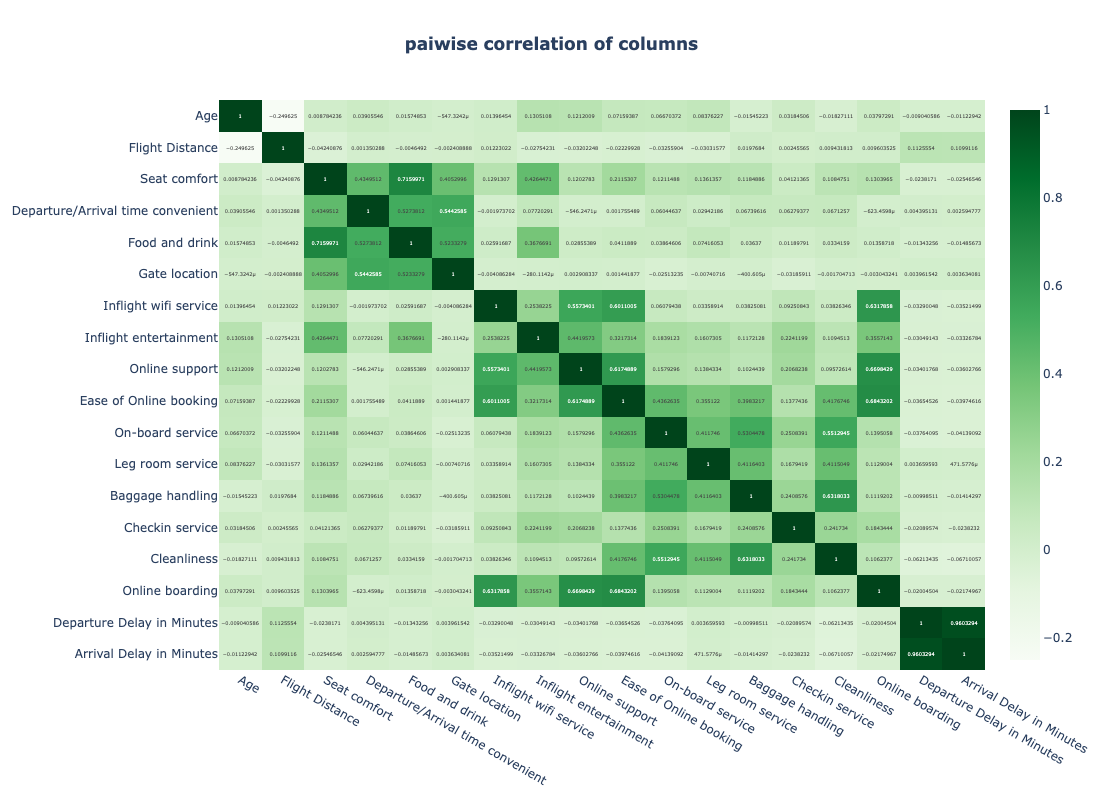

In [7]:
fig=px.imshow(df.corr(),text_auto=True,height=800,width=800,color_continuous_scale=px.colors.sequential.Greens,aspect='auto',title='<b>paiwise correlation of columns')
fig.update_layout(title_x=0.5)
fig.show()

# Clasificación de variables

Variables Cuantitativas:

* Flight Distance
* Seat comfort
* Departure/Arrival time convenient
* Food and drink
* Gate location
* Inflight wifi service
* Inflight entertainment
* Online support
* Ease of Online booking
* On-board service
* Leg room service
* Baggage handling
* Checkin service
* Cleanliness
* Online boarding
* Departure Delay in Minutes
* Arrival Delay in Minutes


Variables cualitativas:   

* satisfaction                       
* Gender                             
* Customer Type
* Type of Travel
* Class                              

In [8]:
colors = {'dissatisfied': '#d62728', 'satisfied': '#2ca02c'}
def set_colors(df):
    return [colors[col] for col in df.columns]

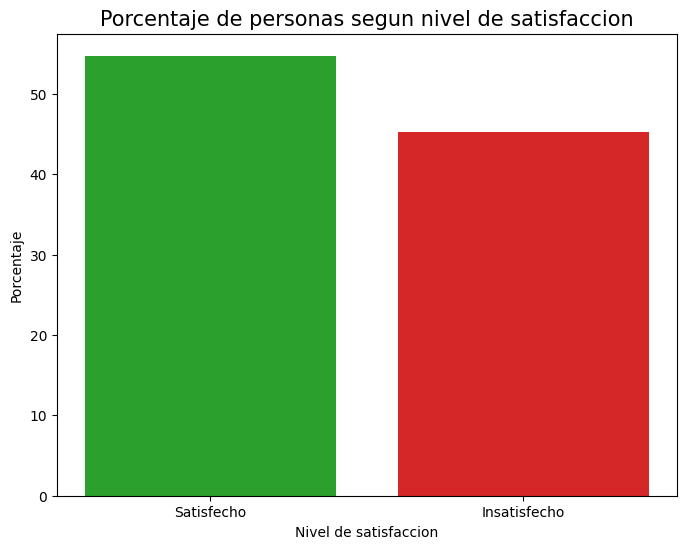

In [9]:
cant_satisfaction = df["satisfaction"].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
plt.title('Porcentaje de personas segun nivel de satisfaccion', fontsize=15)
plt.bar(cant_satisfaction.index, cant_satisfaction, color=['#2ca02c', '#d62728'])
plt.xticks(ticks=[0, 1], labels=["Satisfecho", "Insatisfecho"])
plt.xlabel("Nivel de satisfaccion")
plt.ylabel("Porcentaje")
plt.show()

## Analisis de la edad de los pasajeros

A continuacion se muestra la distribucion de la edad de los pasajeros

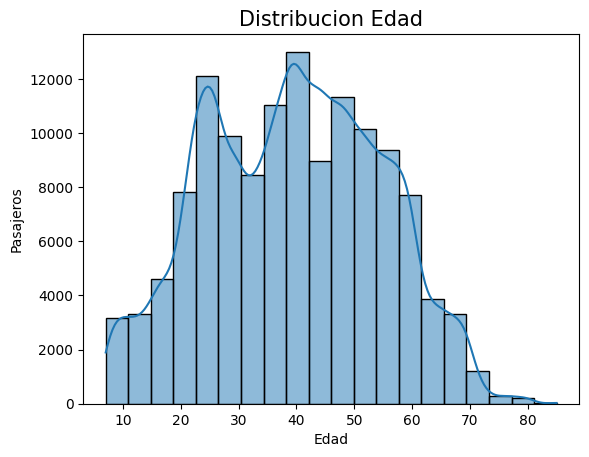

In [10]:
sns.histplot(df.Age, bins=20, kde=True)
plt.title("Distribucion Edad", fontsize=15)
plt.xlabel("Edad")
plt.ylabel("Pasajeros")
plt.show()

Se puede observar que hay una leve tendencia de que las personas mas jovenes esten insatisfechos con la experiencia de vuelo

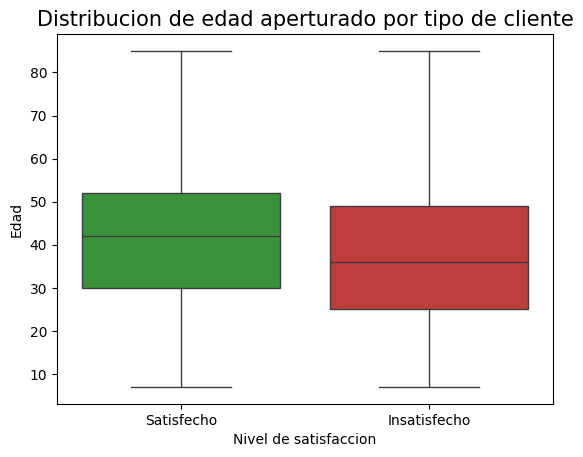

In [11]:
sns.boxplot(data=df, x="satisfaction", y="Age", hue="satisfaction", palette=colors)
plt.title('Distribucion de edad aperturado por tipo de cliente', fontsize=15)
plt.xticks(ticks=[0, 1], labels=["Satisfecho", "Insatisfecho"])
plt.xlabel("Nivel de satisfaccion")
plt.ylabel("Edad")
plt.show()

A su vez si se analiza la edad por el tipo de cliente, tambien se ve una tendencia de que los clientes desleales son mas jovenes que los leales.

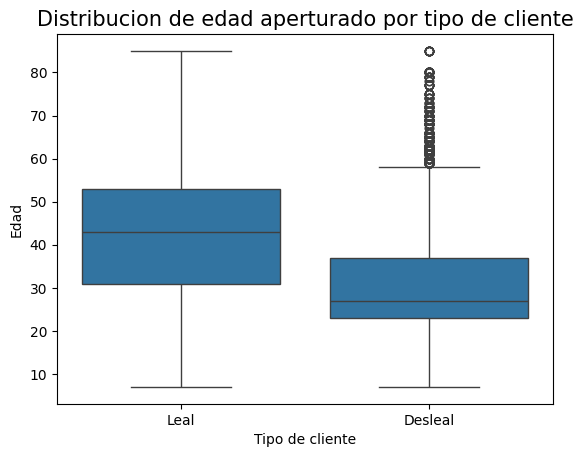

In [12]:
sns.boxplot(data=df, x="Customer Type", y="Age")
plt.title('Distribucion de edad aperturado por tipo de cliente', fontsize=15)
plt.xticks(ticks=[0, 1], labels=["Leal", "Desleal"])
plt.xlabel("Tipo de cliente")
plt.ylabel("Edad")
plt.show()

## Analisis sobre el genero de las personas
Se puede observar que la distribucion por genero es equivalente para ambos sexos

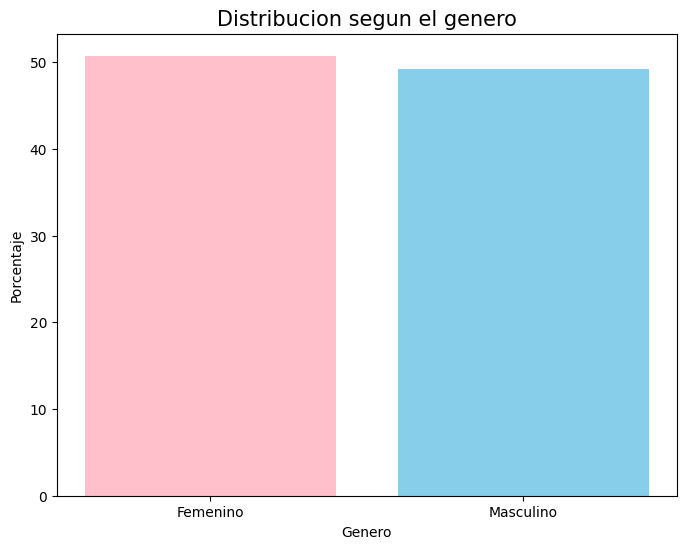

In [13]:
cant_gender = df["Gender"].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
plt.title('Distribucion segun el genero', fontsize=15)
plt.bar(cant_gender.index, cant_gender, color=['pink', '#87CEEB'])
plt.xticks(ticks=[0, 1], labels=["Femenino", "Masculino"])
plt.xlabel("Genero")
plt.ylabel("Porcentaje")
plt.show()

Podemos observar que hay una tendecia en que las mujeres suelen estar mas satisfechas, y que hay una leve tendencia en que los hombres esten mas insatisfechos que satisfechos con la experiencia del vuelo

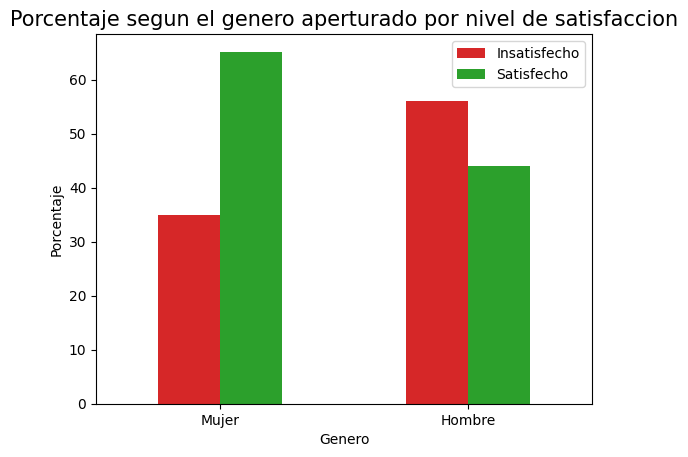

In [14]:
dis_gender_satisfaction = pd.crosstab(df["Gender"], df["satisfaction"])
dis_gender_satisfaction_per = dis_gender_satisfaction.div(dis_gender_satisfaction.sum(axis=1), axis=0) * 100

dis_gender_satisfaction_per.plot(kind='bar', color=set_colors(dis_gender_satisfaction_per))
plt.title('Porcentaje segun el genero aperturado por nivel de satisfaccion', fontsize=15)
plt.xticks(ticks=[0, 1], labels=["Mujer", "Hombre"], rotation=0)
plt.xlabel("Genero")
plt.ylabel("Porcentaje")
plt.legend(labels=["Insatisfecho", "Satisfecho"])
plt.show()

Se observa una leve tendencia de que las mujeres puntuan mejor la comida y bebida que los hombres

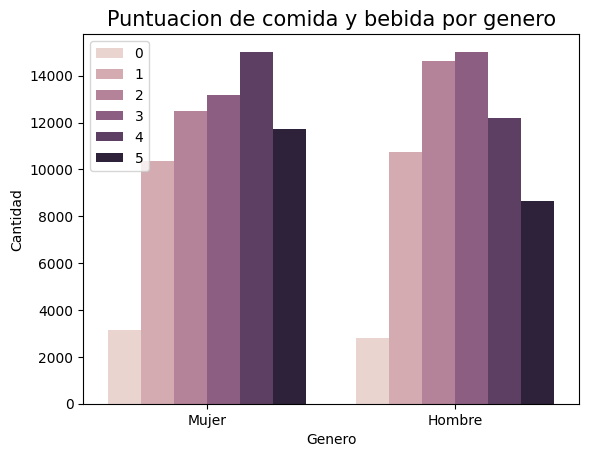

In [15]:
sns.countplot(df, x="Gender", hue="Food and drink")
plt.title('Puntuacion de comida y bebida por genero', fontsize=15)
plt.xticks(ticks=[0, 1], labels=["Mujer", "Hombre"], rotation=0)
plt.xlabel("Genero")
plt.ylabel("Cantidad")
plt.legend(loc="upper left")
plt.show()

Se hace un analisis sobre la distribucion de mujeres y hombres respecto a la satisfaccion

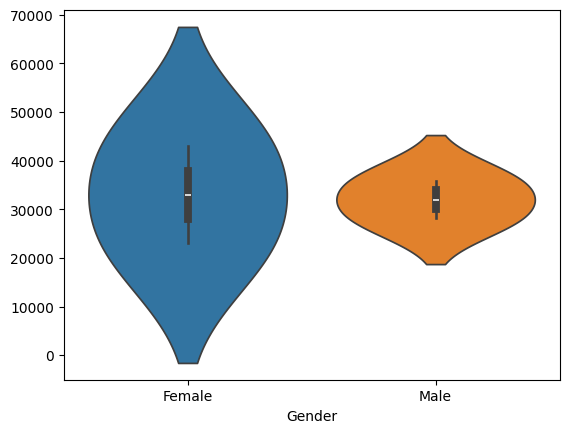

In [16]:
sns.violinplot(pd.crosstab(df['satisfaction'],df['Gender']));

## Analisis sobre el Tipo de cliente

Con este mapa de calor se puede observar que si el cliente esta satisfecho es demasiado probable que sea un cliente leal, y tambien que si es un cliente desleal es probable que este insatisfecho

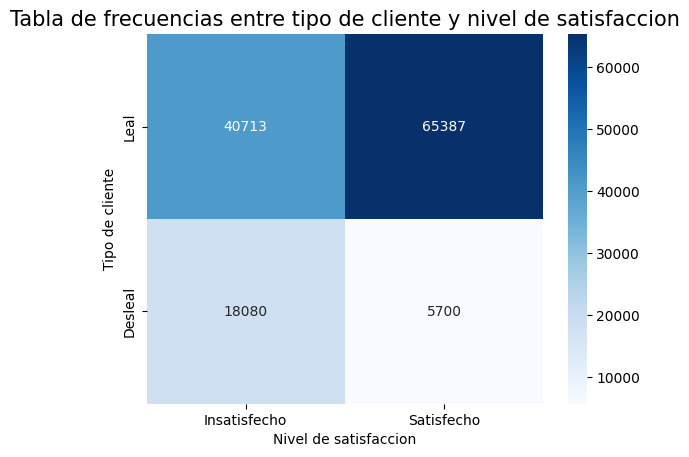

In [17]:
sns.heatmap(pd.crosstab(df["Customer Type"], df["satisfaction"]), annot=True, fmt='g',cmap='Blues')
plt.title('Tabla de frecuencias entre tipo de cliente y nivel de satisfaccion', fontsize=15)
plt.xticks(ticks=[0.5, 1.5], labels=["Insatisfecho", "Satisfecho"], rotation=0)
plt.yticks(ticks=[0.5, 1.5], labels=["Leal", "Desleal"])
plt.xlabel("Nivel de satisfaccion")
plt.ylabel("Tipo de cliente")
plt.show()

Se analizo el porcentaje de satisfaccion por tipo de cliente y se observa que los clientes leales suelen estar satisfechos, mientras que los desleales suelen estar en su mayoria insatisfechos

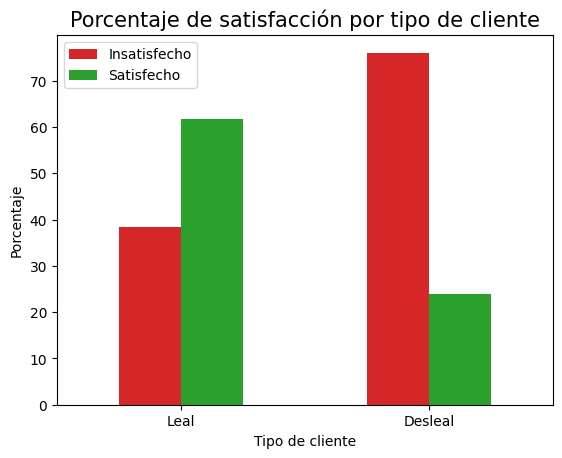

In [18]:
dist_cus_satisfaction = pd.crosstab(df["Customer Type"], df["satisfaction"])
dist_cus_satisfaction_per = dist_cus_satisfaction.div(dist_cus_satisfaction.sum(axis=1), axis=0) * 100

dist_cus_satisfaction_per.plot(kind='bar', color=set_colors(dist_cus_satisfaction_per))
plt.title('Porcentaje de satisfacción por tipo de cliente', fontsize=15)
plt.xticks(ticks=[0, 1], labels=["Leal", "Desleal"], rotation=0)
plt.xlabel("Tipo de cliente")
plt.ylabel("Porcentaje")
plt.legend(labels=["Insatisfecho", "Satisfecho"])
plt.show()

## Analisis sobre el tipo de clase

Analizando el tipo de clase, podemos observar que para la clase business, la mayoria esta satisfecha, mientras que en el resto de las clases predomina mas los insatisfechos

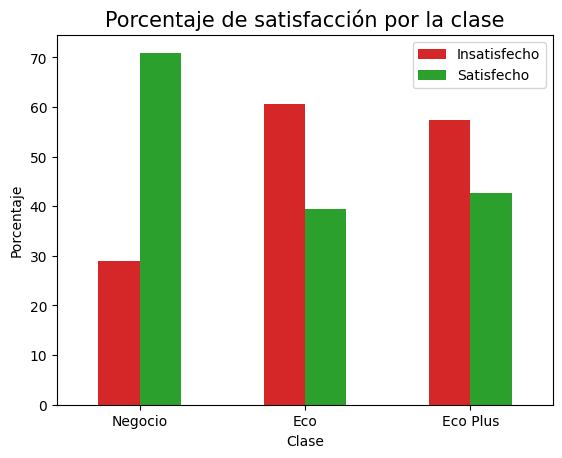

In [19]:
dist_class_satisfaction = pd.crosstab(df["Class"], df["satisfaction"])
dist_class_satisfaction_per = dist_class_satisfaction.div(dist_class_satisfaction.sum(axis=1), axis=0) * 100

dist_class_satisfaction_per.plot(kind='bar', color=set_colors(dist_class_satisfaction_per))
plt.title('Porcentaje de satisfacción por la clase', fontsize=15)
plt.xticks(ticks=[0, 1, 2], labels=["Negocio", "Eco", "Eco Plus"], rotation=0)
plt.xlabel("Clase")
plt.ylabel("Porcentaje")
plt.legend(labels=["Insatisfecho", "Satisfecho"])
plt.show()

Se observa la clase respecto del tipo de viaje

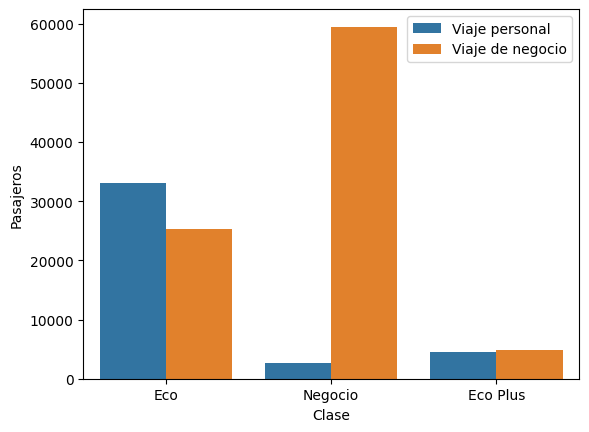

In [20]:
sns.countplot(df, hue="Type of Travel", x="Class")
plt.xticks(ticks=[0, 1, 2], labels=["Eco", "Negocio","Eco Plus"], rotation=0)
plt.xlabel("Clase")
plt.ylabel("Pasajeros")
plt.legend(labels=["Viaje personal", "Viaje de negocio"])
plt.show()

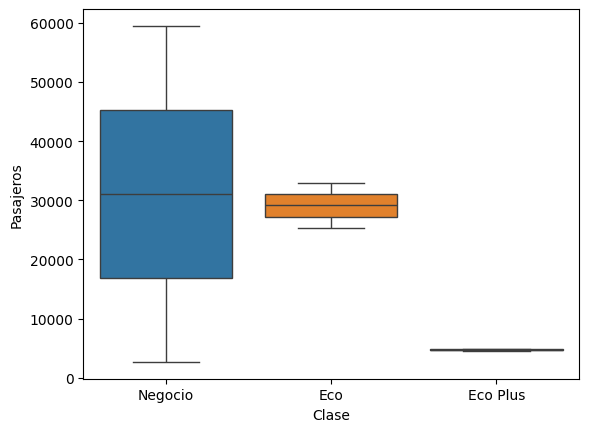

In [21]:
sns.boxplot(pd.crosstab(df['Type of Travel'],df['Class']), showfliers=False)
plt.xticks(ticks=[0, 1, 2], labels=["Negocio", "Eco", "Eco Plus"], rotation=0)
plt.xlabel("Clase")
plt.ylabel("Pasajeros")
plt.show()

## Analisis sobre el tipo de viaje
En base al tipo de viaje, se puede observar que hay una leve tendencia en los viajes empresariales a estar mas satisfechos que en los viajes personales

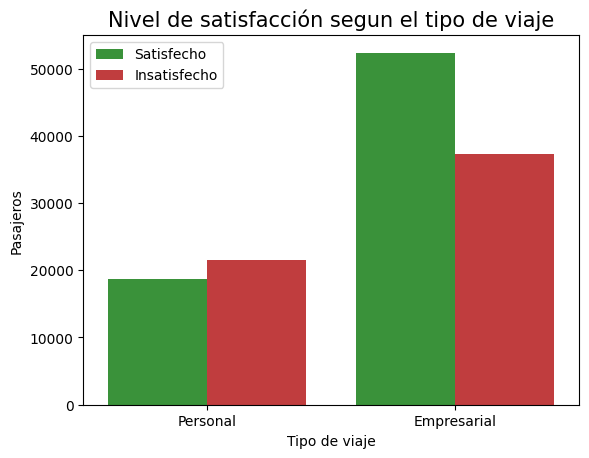

In [23]:
sns.countplot(df, hue="satisfaction", x="Type of Travel", palette=colors)
plt.title('Nivel de satisfacción segun el tipo de viaje', fontsize=15)
plt.xticks(ticks=[0, 1], labels=["Personal", "Empresarial"], rotation=0)
plt.xlabel("Tipo de viaje")
plt.ylabel("Pasajeros")
plt.legend(labels=["Satisfecho", "Insatisfecho"])
plt.show()

## Analisis sobre los minutos de retraso
Se puede observar que el promedio de minutos de retraso en la llegada es menor para los clientes satisfechos que los insatisfechos

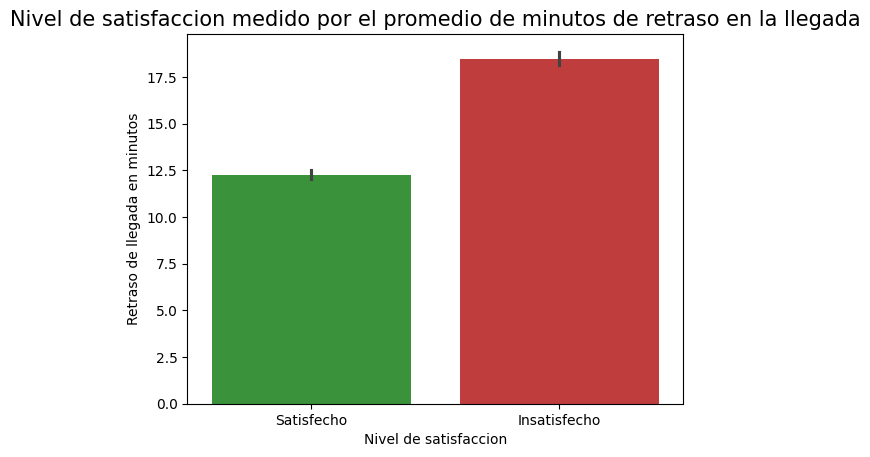

In [24]:
sns.barplot(data=df, x="satisfaction", y="Arrival Delay in Minutes", hue="satisfaction", palette=colors)
plt.title('Nivel de satisfaccion medido por el promedio de minutos de retraso en la llegada', fontsize=15)
plt.xticks(ticks=[0, 1], labels=["Satisfecho", "Insatisfecho"], rotation=0)
plt.xlabel("Nivel de satisfaccion")
plt.ylabel("Retraso de llegada en minutos")
plt.show()

Se puede observar que hay una relacion casi directa entre los minutos de retraso en la salida y los minutos de retraso en la llegada

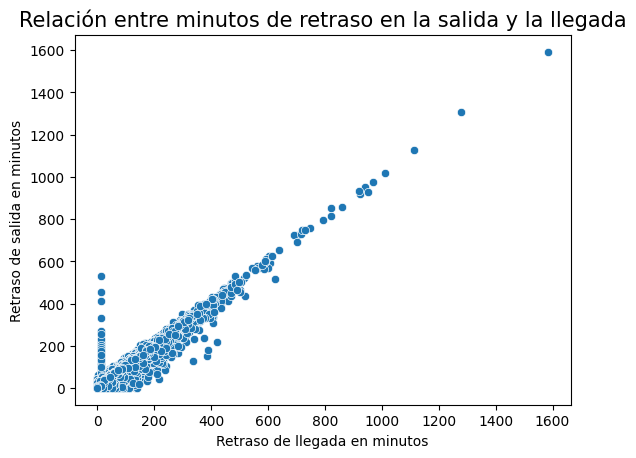

In [25]:
sns.scatterplot(x=df['Arrival Delay in Minutes'], y=df['Departure Delay in Minutes'])
plt.title('Relación entre minutos de retraso en la salida y la llegada', fontsize=15)
plt.xlabel("Retraso de llegada en minutos")
plt.ylabel("Retraso de salida en minutos")
plt.show()

## Analisis sobre la comida y bebida respecto a la comodidad del asiento
Se puede observar que hay una relacion casi directa entre ambas variables

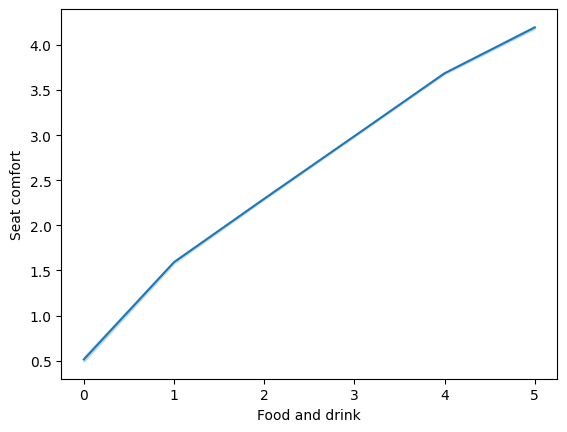

In [26]:
sns.lineplot(x=df['Food and drink'], y=df['Seat comfort']);

## Analisis sobre la distancia de vuelo
A continuacion se muestra la distribucion de la distancia de vuelo

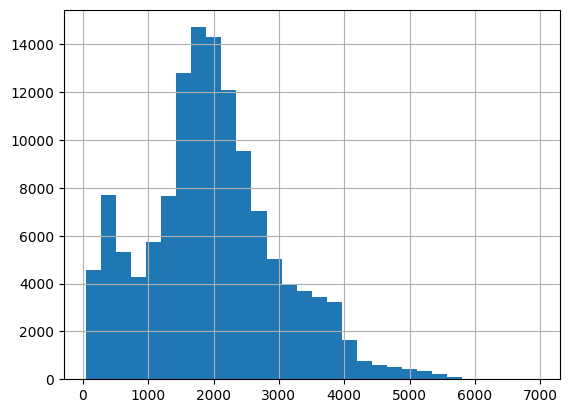

In [27]:
df['Flight Distance'].hist(bins=30)
plt.show()

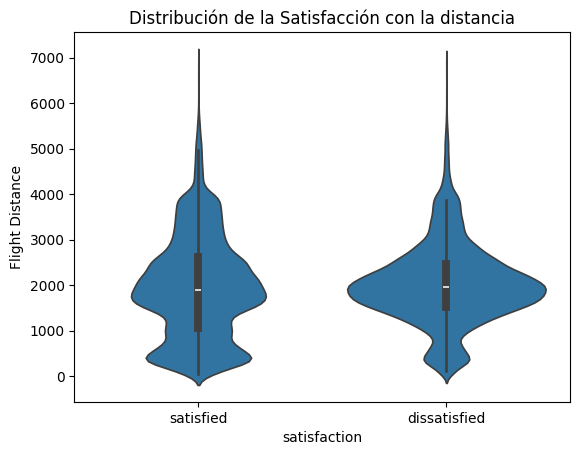

In [28]:
sns.violinplot(x='satisfaction', y='Flight Distance', data=df)
plt.title('Distribución de la Satisfacción con la distancia')
plt.show()

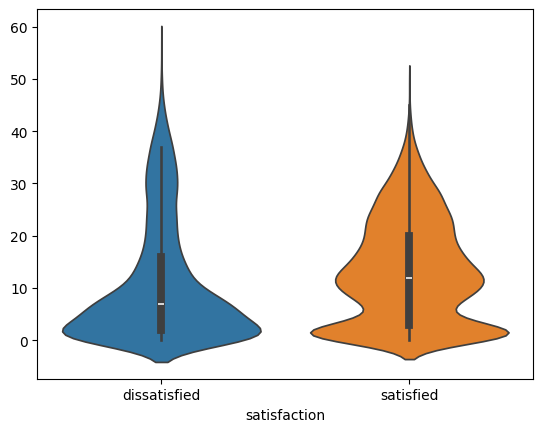

In [29]:
sns.violinplot(pd.crosstab(df['Flight Distance'],df['satisfaction']));


## Analisis sobre el entretenimiento en vuelo
Se puede observar que las personas satisfechas puntuan mas alto al entretenimiento en vuelo que las insatisfechas

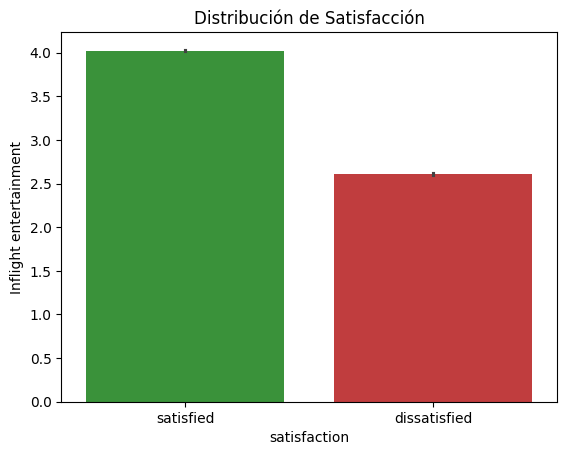

In [22]:
sns.barplot(x='satisfaction', y='Inflight entertainment', hue="satisfaction", data=df, palette=colors)
plt.title('Distribución de Satisfacción')
plt.show()

# Creación de Variables OneHotEncoder de las variables categóricas

* Una vez creada las variables se dropean las antiguas columnas y se concatenan las del encoder.

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

#transformamos variables categoricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_columns = X.select_dtypes(include=['object']).columns

encoded_features = encoder.fit_transform(X[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
X_encoded = pd.concat([X.reset_index(drop=True), encoded_df], axis=1)
X_encoded.drop(columns=categorical_columns, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Elección de Hiperparámetros

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier


param_grid_lr = {
    'lr__C': [1, 10],
    'lr__solver': ['liblinear']
}

param_grid_knn = {
    'knn__n_neighbors': [12,8],
    # 'knn__weights': ['uniform', 'distance'],
    # 'knn__metric': ['euclidean', 'manhattan']
}

param_grid_rf = {
    'rf__n_estimators': [50, 200],
    'rf__max_depth': [5, 30],
    #Mejores Hiperparámetros: {'rf__max_depth': 30, 'rf__n_estimators': 200}
    # 'rf__min_samples_split': [2, 5],
    # 'rf__min_samples_leaf': [1, 2]
}

param_grid_ada = {
    'ada__n_estimators': [30, 100],
    'ada__learning_rate': [0.01, 0.1]

    #Mejores Hiperparámetros: {'ada__learning_rate': 0.1, 'ada__n_estimators': 100}
}

models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000, random_state=0), param_grid_lr),
    'KNN': (KNeighborsClassifier(), param_grid_knn),
    'Random Forest': (RandomForestClassifier(random_state=0), param_grid_rf),
    'AdaBoost': (AdaBoostClassifier(random_state=0), param_grid_ada)
}

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc

# Usamos StandardScaler() para escalar las variables
pipelines = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000, random_state=0))]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
    'Random Forest': Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=0))]),
    'AdaBoost': Pipeline([('scaler', StandardScaler()), ('ada', AdaBoostClassifier(random_state=0))])
}

best_estimators = {}
for model_name, pipeline in pipelines.items():
    print(f"Optimizing {model_name}...")
    param_grid = models[model_name][1]
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"{model_name}")
    print("Mejores Hiperparámetros:", grid_search.best_params_)

    print("-" * 50)

Optimizing Logistic Regression...
Logistic Regression
Mejores Hiperparámetros: {'lr__C': 1, 'lr__solver': 'liblinear'}
--------------------------------------------------
Optimizing KNN...
KNN
Mejores Hiperparámetros: {'knn__n_neighbors': 12}
--------------------------------------------------
Optimizing Random Forest...
Random Forest
Mejores Hiperparámetros: {'rf__max_depth': 30, 'rf__n_estimators': 200}
--------------------------------------------------
Optimizing AdaBoost...
AdaBoost
Mejores Hiperparámetros: {'ada__learning_rate': 0.1, 'ada__n_estimators': 100}
--------------------------------------------------


In [9]:
best_estimators

{'Logistic Regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('lr',
                  LogisticRegression(C=1, max_iter=1000, random_state=0,
                                     solver='liblinear'))]),
 'KNN': Pipeline(steps=[('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier(n_neighbors=12))]),
 'Random Forest': Pipeline(steps=[('scaler', StandardScaler()),
                 ('rf',
                  RandomForestClassifier(max_depth=30, n_estimators=200,
                                         random_state=0))]),
 'AdaBoost': Pipeline(steps=[('scaler', StandardScaler()),
                 ('ada',
                  AdaBoostClassifier(learning_rate=0.1, n_estimators=100,
                                     random_state=0))])}

In [10]:

predictions = {}
y_test_binary = y_test.map({'dissatisfied': 0, 'satisfied': 1})
for model_name, model in best_estimators.items():
 y_pred = best_estimators[model_name].predict(X_test)
 y_pred_proba = best_estimators[model_name].predict_proba(X_test)[:, 1]
 print(model_name)
 predictions[model_name] = {'y_pred': y_pred, 'y_pred_proba':y_pred_proba}



Logistic Regression
KNN
Random Forest
AdaBoost


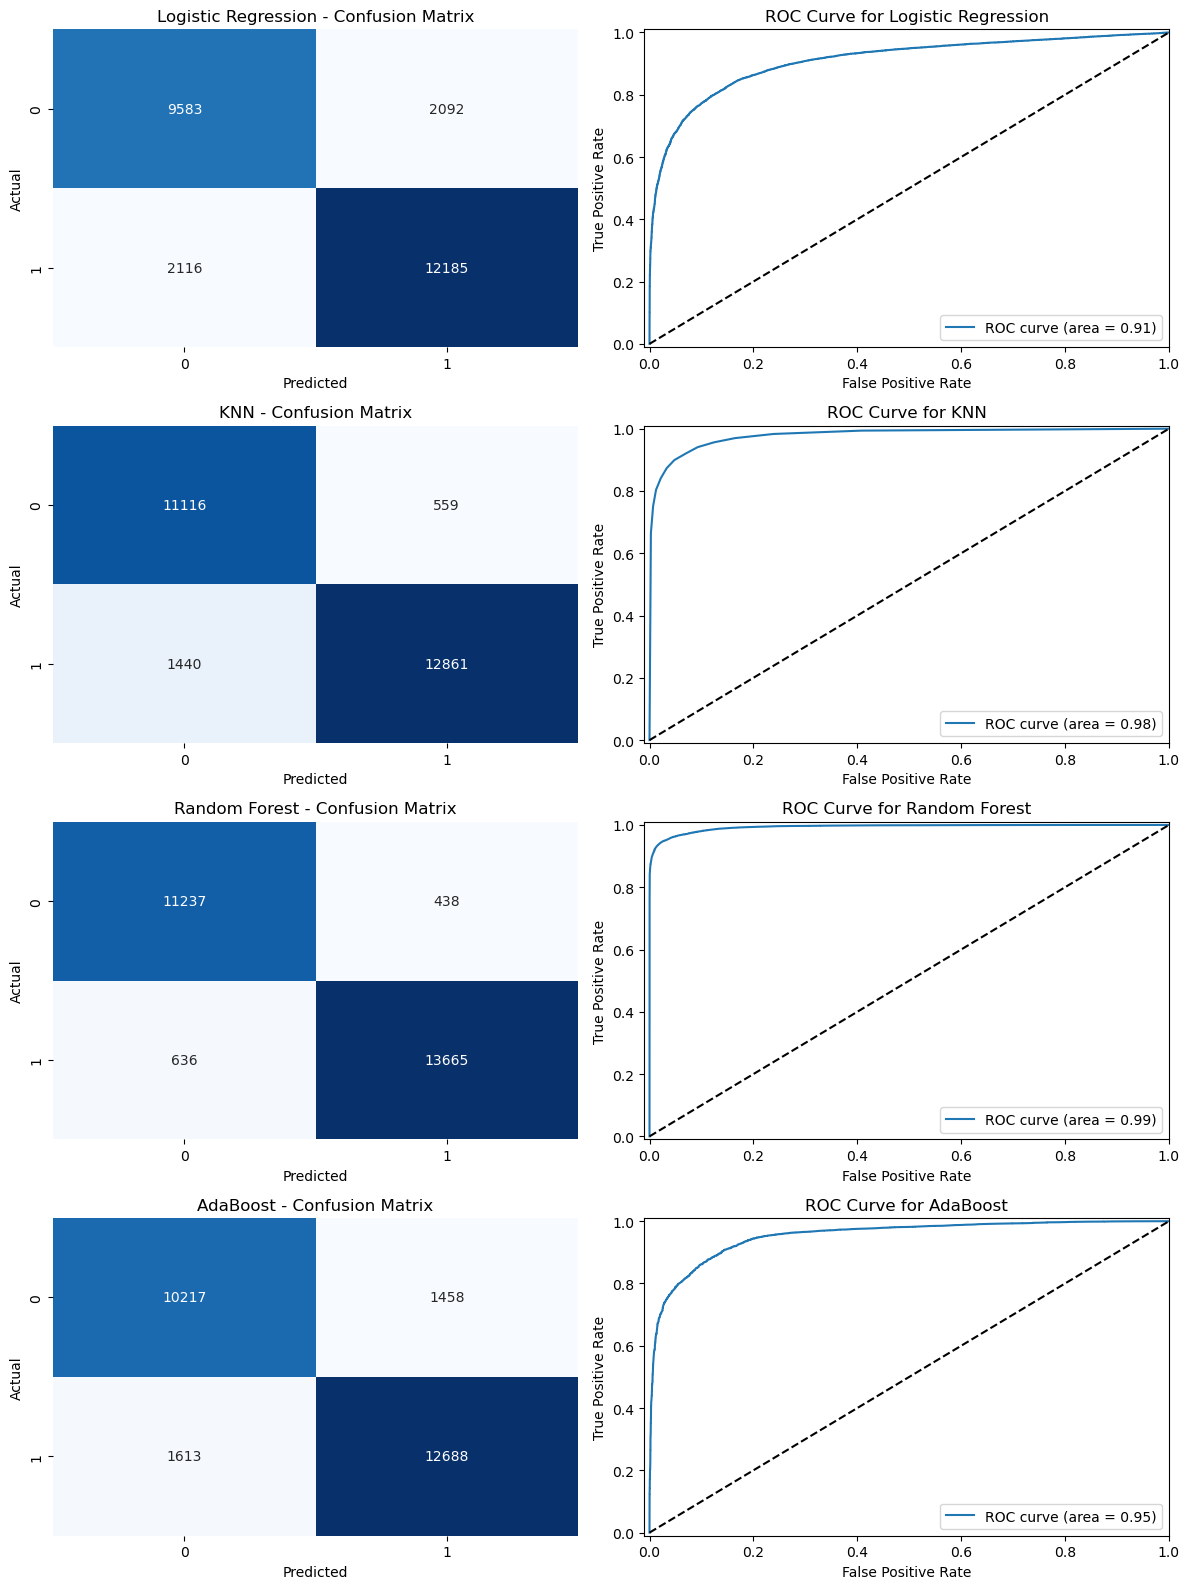

In [11]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

fig, axs = plt.subplots(len(pipelines), 2, figsize=(12, (4) * len(pipelines)))
                                              #6

for i, (model_name, prediction) in enumerate(predictions.items()):
    y_pred = prediction['y_pred']
    y_pred_proba = prediction['y_pred_proba']

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[i, 0])
    axs[i, 0].set_title(f'{model_name} - Confusion Matrix')
    axs[i, 0].set_xlabel('Predicted')
    axs[i, 0].set_ylabel('Actual')

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)  #Usamos y_test_binary en lugar de y_test
    roc_auc = auc(fpr, tpr)
    axs[i, 1].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    axs[i, 1].plot([0, 1], [0, 1], 'k--')
    axs[i, 1].set_xlim([-0.01, 1.0])
    axs[i, 1].set_ylim([-0.01, 1.01])
    axs[i, 1].set_xlabel('False Positive Rate')
    axs[i, 1].set_ylabel('True Positive Rate')
    axs[i, 1].set_title(f'ROC Curve for {model_name}')
    axs[i, 1].legend(loc='lower right')

plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Otras métricas
for model_name, prediction in predictions.items():
    y_pred = prediction['y_pred']

    precision = precision_score(y_test, y_pred, pos_label='satisfied')
    recall = recall_score(y_test, y_pred, pos_label='satisfied')
    f1 = f1_score(y_test, y_pred, pos_label='satisfied')
    accuracy = accuracy_score(y_test, y_pred)

    print(f'{model_name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(classification_report(y_test, y_pred))

Logistic Regression Metrics:
Accuracy: 0.84
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
              precision    recall  f1-score   support

dissatisfied       0.82      0.82      0.82     11675
   satisfied       0.85      0.85      0.85     14301

    accuracy                           0.84     25976
   macro avg       0.84      0.84      0.84     25976
weighted avg       0.84      0.84      0.84     25976

KNN Metrics:
Accuracy: 0.92
Precision: 0.96
Recall: 0.90
F1 Score: 0.93
              precision    recall  f1-score   support

dissatisfied       0.89      0.95      0.92     11675
   satisfied       0.96      0.90      0.93     14301

    accuracy                           0.92     25976
   macro avg       0.92      0.93      0.92     25976
weighted avg       0.93      0.92      0.92     25976

Random Forest Metrics:
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.96
              precision    recall  f1-score   support

dissatisfied       0.95      0.96      0.95     1

# Conclusiones

Luego de las optimizaciones en los modelos y sus datos obtenidos de las métricas podemos concluir que:

* Random Forest presenta las mejores métricas en cuanto a Accuracy, Precision, Recall y F1 Score, seguido por K-Nearest Neighbors, tercero Adaboost y por último Regresión Logística..
* Se puede apreciar que la regresión logística brindo un rendimiento más bajo que el resto de modelos debido a su naturaleza lineal que genera mucho sesgo al entrenarse en un dataset con gran cantidades de variables, de las no puede capturar relaciones complejas.
* Si bien tanto el Random Forest como el AdaBoost utilizan el enfoque de ensamble, el random forest promedia las predicciones de múltiples arboles de decisión dando una precisión alta con bajo números de falsos negativos y en cambio el AdaBoost asigna pesos a los modelos individuales y luego los pondera haciendolo un poco más susceptible a outliers al asignar pesos a datos mal clasificados.
* K-Nearest Neighbors resultó ser un buen modelo para predecir la satisfacción de los clientes en la aerolínea debido a la naturaleza del algoritmo y la clasificación de clases.
* Mirando la tabla de confusión del Random Forest, la precisión es muy alta debido al bajo número de falsos negativos (636) y falsos positivos (438).

# Beneficios de aplicar Machine Learning a la Solució
n* Automatización de tareas y descubrimiento de patrones para toma de decisiones informadas.i* a.

Mejora en planificación de rutas, gestión de capacidad y entretenimiento a isiones.
* Predecir la satisfacción del cliente, mediante el uso de los algoritms), analizando las correlaciones de diferentes variables con el target y poder comprender por ejemplo la relación entre la comodidad del asiento de un pasajero y su satisfacción.
* Esto permite a las aerolíneas anticiparse a las necesidades de los pasajeros y tomar medidas para mejorar su experiencia, como puede ser la planificación de rutas, gestión de la capacidad, entretenimiento en la aeronave, entre otras actividades.